In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.target.shape

(1797,)

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

5


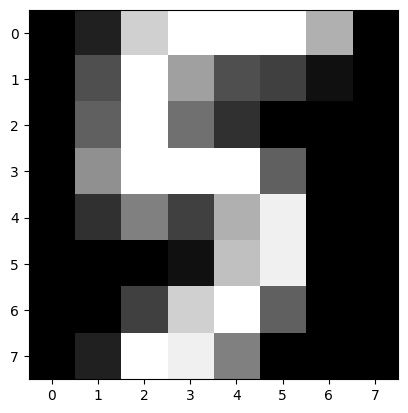

In [6]:
import matplotlib.pyplot as plt

num = 32
x = digits.images[num]
print(digits.target[num])
plt.gray()
plt.imshow(x)
plt.show()

## 1. Preprocess

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [8]:
x_train[0]

array([ 0.,  0.,  7., 16., 13.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
        5.,  0.,  0.,  0.,  1., 16., 16., 16.,  3.,  0.,  0.,  0.,  1.,
       14., 16., 15.,  0.,  0.,  0.,  0.,  1., 16., 16., 15.,  1.,  0.,
        0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
       16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 13.,  6.,  0.,  0.])

## 1.1 Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0, 1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [10]:
x_train[0]

array([0.        , 0.        , 0.4375    , 1.        , 0.8125    ,
       0.3125    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 1.        , 1.        , 0.3125    , 0.        ,
       0.        , 0.        , 0.0625    , 1.        , 1.        ,
       1.        , 0.1875    , 0.        , 0.        , 0.        ,
       0.06666667, 0.875     , 1.        , 0.9375    , 0.        ,
       0.        , 0.        , 0.        , 0.07142857, 1.        ,
       1.        , 0.9375    , 0.0625    , 0.        , 0.        ,
       0.        , 0.        , 0.875     , 1.        , 1.        ,
       0.25      , 0.        , 0.        , 0.        , 0.        ,
       0.375     , 1.        , 1.        , 0.4375    , 0.        ,
       0.        , 0.        , 0.        , 0.25      , 0.875     ,
       0.8125    , 0.375     , 0.        , 0.        ])

# PCA

In [11]:
x_train.shape, x_test.shape


((1257, 64), (540, 64))

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [13]:
x_train.shape, x_test.shape


((1257, 32), (540, 32))

##  Performance metrics

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)


# ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

  p = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
  r = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

  print(f"acc train: {acc_train} - acc test: {acc_test} - precision:{p} - recall{r}")

  return acc_train, acc_test, p, r

## Classifications


## 1. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=256, max_depth=128)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [16]:
# multi class type

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9777777777777777 - precision:0.9781809278947576 - recall0.9777777777777777


## 2. SVM

In [17]:
from sklearn.svm import SVC

# svm = SVC()
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [18]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9984089101034208 - acc test: 0.9851851851851852 - precision:0.9861926127774342 - recall0.9851851851851852


## 3. ANN

In [19]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier()
# ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu', solver='adam', batch_size=64, learning_rate='adaptive')
# ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam')
ann.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [20]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9796296296296296 - precision:0.9800815964412455 - recall0.9796296296296296


## 4. KNN


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [22]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9872712808273667 - acc test: 0.9833333333333333 - precision:0.9835074733222882 - recall0.9833333333333333


## Comparasion

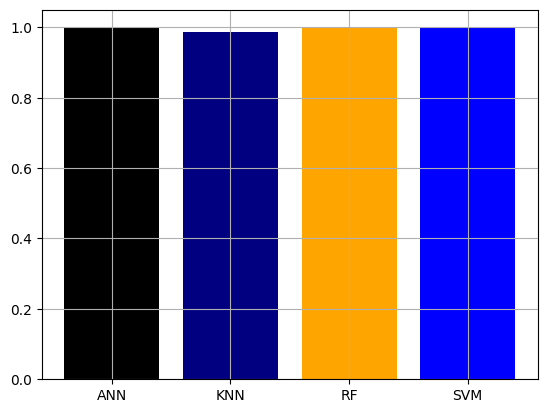

In [23]:
import matplotlib.pyplot as plt

acc_train = [ acc_train_ann, acc_train_knn, acc_train_rf, acc_train_svm]
title = ["ANN","KNN", "RF", "SVM"]
colors = ['black','navy','orange','blue','green']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

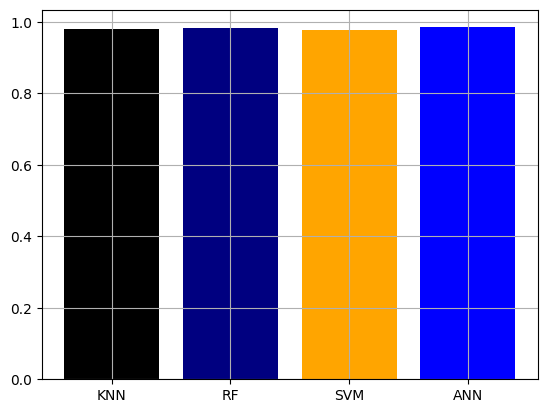

In [24]:
import matplotlib.pyplot as plt

acc_test = [ acc_test_ann, acc_test_knn, acc_test_rf, acc_test_svm]
title = ["KNN", "RF", "SVM","ANN"]
colors = ['black','navy','orange','blue','green']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

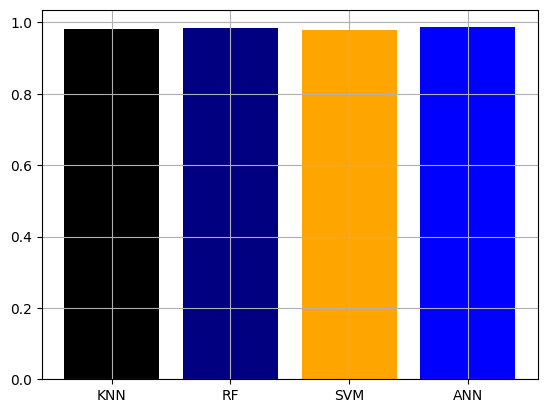

In [25]:
import matplotlib.pyplot as plt

p = [ p_ann, p_knn, p_rf, p_svm]
title = ["KNN", "RF", "SVM","ANN"]
colors = ['black','navy','orange','blue','green']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

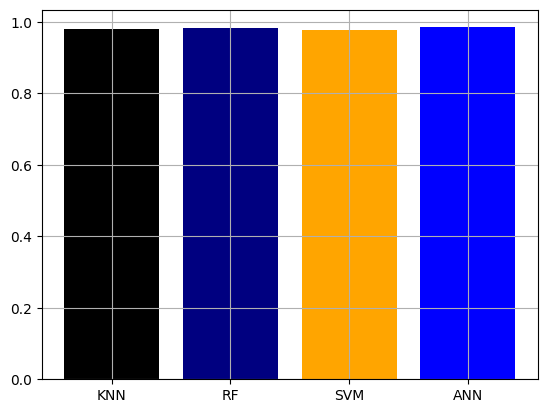

In [26]:
import matplotlib.pyplot as plt

r = [ r_ann, r_knn, r_rf, r_svm]
title = ["KNN", "RF", "SVM","ANN"]
colors = ['black','navy','orange','blue','green']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()